# Drought Severity Index

Generating the drought severity index for `2016_08` in Angola.

In [63]:
import rasterio as rio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as colors
import cartopy.crs as ccrs
from shapely import wkt

# Single Case: August 2016

In [2]:
from rasterstats import zonal_stats
raster_path = "../data/processed/monthly_drought_labels/2016_08.tif"
shp_path = "../data/external/Angola_provinces"

In [3]:
with rio.open(raster_path) as src:
    bounds = src.bounds
    nodata_val = src.nodatavals
    crs = src.crs
    drought_labels = src.read(1)
boundaries = gpd.read_file(shp_path)
boundaries = boundaries.to_crs(crs)

Visualize the pixelated drought label data, emphasizing the province **Kuando Kubango** which seems to be the province that is most affected.

In [6]:
# Let's create a colormap with 5 colors, to match the drought levels (USDM)
custom_colors = [
    "white",
    "yellow",
    "#FFDAB9",
    "orange",
    "red",
    "darkred",
]
cmap = colors.ListedColormap(custom_colors)


In [11]:
def viz_tiff_monthly(date):
    tif_sample = f"../data/processed/monthly_drought_labels/{date}.tif"
    with rio.open(tif_sample) as src:
        label = src.read(1)
        bounds = src.bounds
        crs = src.crs
    fig = plt.figure(figsize=(10, 10))
    img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.PlateCarree()) 

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                    alpha=0.5, linestyle='--', ylabel_style={'size': 14, 'rotation': 'vertical'}, 
                    xlabel_style={'size': 14}) #TODO: insert line styles later

    gl.xlabels_bottom = False
    gl.ylabels_right = False

    plot = ax.imshow(label, cmap=cmap, extent=img_extent)
    boundaries.geometry.boundary.plot(ax=ax, color='black', linewidth = 1)
    boundaries[boundaries.NAME == 'Kuando Kubango'].geometry.boundary.plot(ax=ax, color='blue', linewidth = 2)

    cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.04])
    cbar = plt.colorbar(plot, cax=cbar_ax, orientation='horizontal', pad=0.05)
    cbar.ax.tick_params(labelsize=16)
    cbar.set_label('USDM Drought Categories', fontsize=18)
    cbar.set_ticklabels(['None', 'D0','D1','D2','D3','D4'])
    cbar.set_ticks(np.linspace(0.35,3.65,6))

    fig.suptitle(f'{date}', fontsize=20)

    plt.savefig(f'../results/figures/{date}.png', dpi=300, bbox_inches='tight')

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\esl26\AppData\Local\Temp\ipykernel_6832\3005241512.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels(['None', 'D0','D1','D2','D3','D4'])


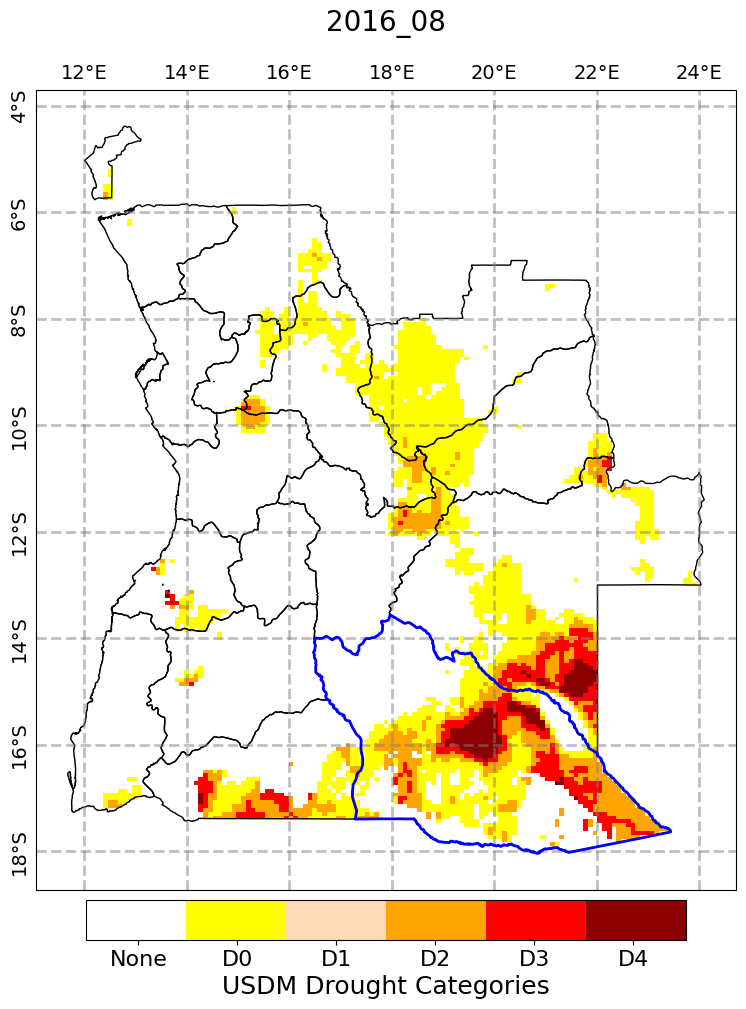

In [12]:
viz_tiff_monthly('2016_08')

Change the NAN values to -1

In [13]:
drought_labels = np.nan_to_num(drought_labels, nan=-1)
drought_labels, np.unique(drought_labels)

(array([[-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        ...,
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.]]),
 array([-1.,  0.,  1.,  2.,  3.,  4.]))

In [14]:
boundaries

,NAME,SHPAREASQM,CODE_PROV,geometry
0,Bengo,3.799123e+10,01,"MULTIPOLYGON (((13.12321 -7.83117, 13.12409 -7..."
1,Benguela,3.954707e+10,02,"MULTIPOLYGON (((12.53478 -13.49164, 12.53566 -..."
2,Bié,7.214479e+10,03,"POLYGON ((16.51990 -12.92742, 16.51794 -12.921..."
3,Cabinda,6.975749e+09,04,"POLYGON ((12.71099 -4.46888, 12.71347 -4.46740..."
4,Kuando Kubango,1.997968e+11,05,"POLYGON ((22.23646 -16.57306, 22.26215 -16.575..."
5,Kwanza Norte,2.029464e+10,06,"POLYGON ((14.54237 -9.77922, 14.53348 -9.77422..."
6,Kwanza Sul,5.539526e+10,07,"POLYGON ((15.26511 -9.79956, 15.27292 -9.79810..."
7,Kunene,7.735317e+10,08,"POLYGON ((16.29437 -17.38978, 15.38930 -17.386..."
8,Huambo,3.318300e+10,09,"POLYGON ((16.32605 -11.60639, 16.32709 -11.611..."
9,Huíla,7.874020e+10,10,"POLYGON ((15.54472 -13.76052, 15.56128 -13.756..."


In [15]:
stats = zonal_stats(boundaries, drought_labels, affine=src.transform, categorical=True)

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\rasterstats\io.py:328: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


In [16]:
stats

[{-1.0: 479},
 {-1.0: 387, 0.0: 43, 1.0: 53, 2.0: 7, 3.0: 7, 4.0: 1},
 {-1.0: 723, 0.0: 62, 1.0: 54, 2.0: 60, 3.0: 3},
 {-1.0: 68, 0.0: 11, 1.0: 7, 2.0: 1},
 {-1.0: 1023, 0.0: 167, 1.0: 547, 2.0: 448, 3.0: 229, 4.0: 127},
 {-1.0: 169, 0.0: 31, 1.0: 35, 2.0: 1, 3.0: 1},
 {-1.0: 645, 0.0: 12, 1.0: 17, 2.0: 17},
 {-1.0: 609, 0.0: 31, 1.0: 160, 2.0: 122, 3.0: 60, 4.0: 3},
 {-1.0: 412},
 {-1.0: 900, 0.0: 73, 1.0: 16, 2.0: 6, 3.0: 1},
 {-1.0: 32},
 {-1.0: 518, 0.0: 327, 1.0: 475, 2.0: 6},
 {-1.0: 533, 0.0: 253, 1.0: 175, 2.0: 10},
 {-1.0: 530, 0.0: 201, 1.0: 251, 2.0: 38, 3.0: 1},
 {-1.0: 1260, 0.0: 391, 1.0: 500, 2.0: 152, 3.0: 154, 4.0: 56},
 {-1.0: 707, 0.0: 1, 1.0: 26, 2.0: 5},
 {-1.0: 522, 0.0: 187, 1.0: 63, 2.0: 2},
 {-1.0: 439, 0.0: 7, 1.0: 2}]

Plot the class in a province using a bar graph

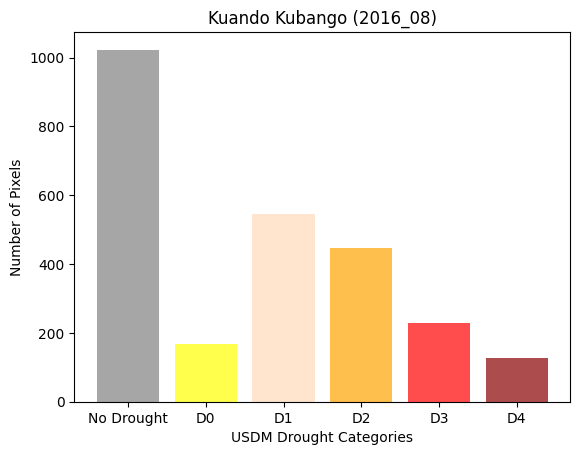

In [17]:
fig, ax = plt.subplots()

# Define the positions of the bars on the x-axis
x_pos = np.arange(6)

# Create the bars
ax.bar(x_pos, stats[4].values(), align='center', alpha=0.7, color=["gray", "yellow", "#FFDAB9", "orange","red", "darkred"])

# Add labels to the x-axis
ax.set_xticks(x_pos)
ax.set_xticklabels(['No Drought','D0', 'D1', 'D2', 'D3', 'D4'])

# Add a title and labels to the axes
ax.set_title('Kuando Kubango (2016_08)')
ax.set_xlabel('USDM Drought Categories')
ax.set_ylabel('Number of Pixels')

# Save the figure
plt.savefig("../results/figures/hist_kuando_kubango_2016_08.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

Add the distribution of data as a column to the geodataframe.

In [18]:
boundaries['Drought Distribution'] = stats
boundaries

,NAME,SHPAREASQM,CODE_PROV,geometry,Drought Distribution
0,Bengo,3.799123e+10,01,"MULTIPOLYGON (((13.12321 -7.83117, 13.12409 -7...",{-1.0: 479}
1,Benguela,3.954707e+10,02,"MULTIPOLYGON (((12.53478 -13.49164, 12.53566 -...","{-1.0: 387, 0.0: 43, 1.0: 53, 2.0: 7, 3.0: 7, ..."
2,Bié,7.214479e+10,03,"POLYGON ((16.51990 -12.92742, 16.51794 -12.921...","{-1.0: 723, 0.0: 62, 1.0: 54, 2.0: 60, 3.0: 3}"
3,Cabinda,6.975749e+09,04,"POLYGON ((12.71099 -4.46888, 12.71347 -4.46740...","{-1.0: 68, 0.0: 11, 1.0: 7, 2.0: 1}"
4,Kuando Kubango,1.997968e+11,05,"POLYGON ((22.23646 -16.57306, 22.26215 -16.575...","{-1.0: 1023, 0.0: 167, 1.0: 547, 2.0: 448, 3.0..."
5,Kwanza Norte,2.029464e+10,06,"POLYGON ((14.54237 -9.77922, 14.53348 -9.77422...","{-1.0: 169, 0.0: 31, 1.0: 35, 2.0: 1, 3.0: 1}"
6,Kwanza Sul,5.539526e+10,07,"POLYGON ((15.26511 -9.79956, 15.27292 -9.79810...","{-1.0: 645, 0.0: 12, 1.0: 17, 2.0: 17}"
7,Kunene,7.735317e+10,08,"POLYGON ((16.29437 -17.38978, 15.38930 -17.386...","{-1.0: 609, 0.0: 31, 1.0: 160, 2.0: 122, 3.0: ..."
8,Huambo,3.318300e+10,09,"POLYGON ((16.32605 -11.60639, 16.32709 -11.611...",{-1.0: 412}
9,Huíla,7.874020e+10,10,"POLYGON ((15.54472 -13.76052, 15.56128 -13.756...","{-1.0: 900, 0.0: 73, 1.0: 16, 2.0: 6, 3.0: 1}"


In [19]:
def generate_ds_index(drought_dist):
    total_pixels = sum(drought_dist.values())
    ds_index = 0
    for i, (_, v) in enumerate(drought_dist.items()):
        ds_index += i*(v/total_pixels)
    return ds_index

In [20]:
boundaries['Drought Severity Index'] = [generate_ds_index(boundaries['Drought Distribution'][i]) for i in range(len(boundaries))]
boundaries

,NAME,SHPAREASQM,CODE_PROV,geometry,Drought Distribution,Drought Severity Index
0,Bengo,3.799123e+10,01,"MULTIPOLYGON (((13.12321 -7.83117, 13.12409 -7...",{-1.0: 479},0.000000
1,Benguela,3.954707e+10,02,"MULTIPOLYGON (((12.53478 -13.49164, 12.53566 -...","{-1.0: 387, 0.0: 43, 1.0: 53, 2.0: 7, 3.0: 7, ...",0.407631
2,Bié,7.214479e+10,03,"POLYGON ((16.51990 -12.92742, 16.51794 -12.921...","{-1.0: 723, 0.0: 62, 1.0: 54, 2.0: 60, 3.0: 3}",0.401330
3,Cabinda,6.975749e+09,04,"POLYGON ((12.71099 -4.46888, 12.71347 -4.46740...","{-1.0: 68, 0.0: 11, 1.0: 7, 2.0: 1}",0.321839
4,Kuando Kubango,1.997968e+11,05,"POLYGON ((22.23646 -16.57306, 22.26215 -16.575...","{-1.0: 1023, 0.0: 167, 1.0: 547, 2.0: 448, 3.0...",1.635577
5,Kwanza Norte,2.029464e+10,06,"POLYGON ((14.54237 -9.77922, 14.53348 -9.77422...","{-1.0: 169, 0.0: 31, 1.0: 35, 2.0: 1, 3.0: 1}",0.455696
6,Kwanza Sul,5.539526e+10,07,"POLYGON ((15.26511 -9.79956, 15.27292 -9.79810...","{-1.0: 645, 0.0: 12, 1.0: 17, 2.0: 17}",0.140376
7,Kunene,7.735317e+10,08,"POLYGON ((16.29437 -17.38978, 15.38930 -17.386...","{-1.0: 609, 0.0: 31, 1.0: 160, 2.0: 122, 3.0: ...",0.986802
8,Huambo,3.318300e+10,09,"POLYGON ((16.32605 -11.60639, 16.32709 -11.611...",{-1.0: 412},0.000000
9,Huíla,7.874020e+10,10,"POLYGON ((15.54472 -13.76052, 15.56128 -13.756...","{-1.0: 900, 0.0: 73, 1.0: 16, 2.0: 6, 3.0: 1}",0.127510


In [21]:
generate_ds_index(boundaries['Drought Distribution'][5])

0.4556962025316456

In [22]:
# explicit function to normalize array
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)    
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

In [23]:
boundaries['Norm Drought Severity Index'] = normalize(boundaries['Drought Severity Index'], 0, 1)
boundaries

,NAME,SHPAREASQM,CODE_PROV,geometry,Drought Distribution,Drought Severity Index,Norm Drought Severity Index
0,Bengo,3.799123e+10,01,"MULTIPOLYGON (((13.12321 -7.83117, 13.12409 -7...",{-1.0: 479},0.000000,0.000000
1,Benguela,3.954707e+10,02,"MULTIPOLYGON (((12.53478 -13.49164, 12.53566 -...","{-1.0: 387, 0.0: 43, 1.0: 53, 2.0: 7, 3.0: 7, ...",0.407631,0.249227
2,Bié,7.214479e+10,03,"POLYGON ((16.51990 -12.92742, 16.51794 -12.921...","{-1.0: 723, 0.0: 62, 1.0: 54, 2.0: 60, 3.0: 3}",0.401330,0.245375
3,Cabinda,6.975749e+09,04,"POLYGON ((12.71099 -4.46888, 12.71347 -4.46740...","{-1.0: 68, 0.0: 11, 1.0: 7, 2.0: 1}",0.321839,0.196774
4,Kuando Kubango,1.997968e+11,05,"POLYGON ((22.23646 -16.57306, 22.26215 -16.575...","{-1.0: 1023, 0.0: 167, 1.0: 547, 2.0: 448, 3.0...",1.635577,1.000000
5,Kwanza Norte,2.029464e+10,06,"POLYGON ((14.54237 -9.77922, 14.53348 -9.77422...","{-1.0: 169, 0.0: 31, 1.0: 35, 2.0: 1, 3.0: 1}",0.455696,0.278615
6,Kwanza Sul,5.539526e+10,07,"POLYGON ((15.26511 -9.79956, 15.27292 -9.79810...","{-1.0: 645, 0.0: 12, 1.0: 17, 2.0: 17}",0.140376,0.085827
7,Kunene,7.735317e+10,08,"POLYGON ((16.29437 -17.38978, 15.38930 -17.386...","{-1.0: 609, 0.0: 31, 1.0: 160, 2.0: 122, 3.0: ...",0.986802,0.603336
8,Huambo,3.318300e+10,09,"POLYGON ((16.32605 -11.60639, 16.32709 -11.611...",{-1.0: 412},0.000000,0.000000
9,Huíla,7.874020e+10,10,"POLYGON ((15.54472 -13.76052, 15.56128 -13.756...","{-1.0: 900, 0.0: 73, 1.0: 16, 2.0: 6, 3.0: 1}",0.127510,0.077960


<Axes: >

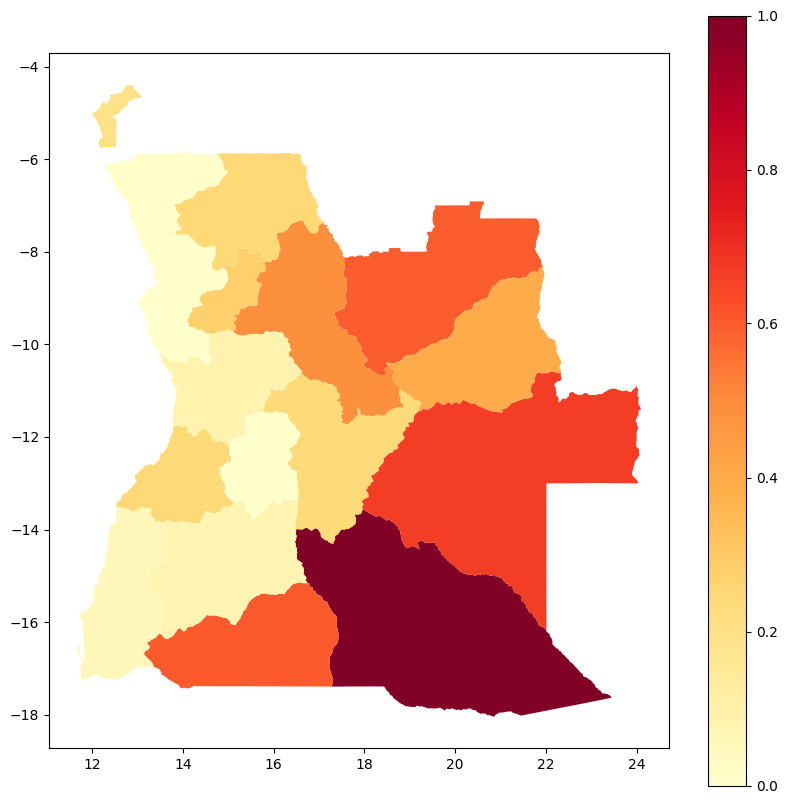

In [24]:
boundaries.plot(column='Norm Drought Severity Index', legend=True, cmap="YlOrRd", figsize=(10, 10))

Check the distribution of the drought severity index.

(array([10.,  4.,  3.,  1.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 <BarContainer object of 4 artists>)

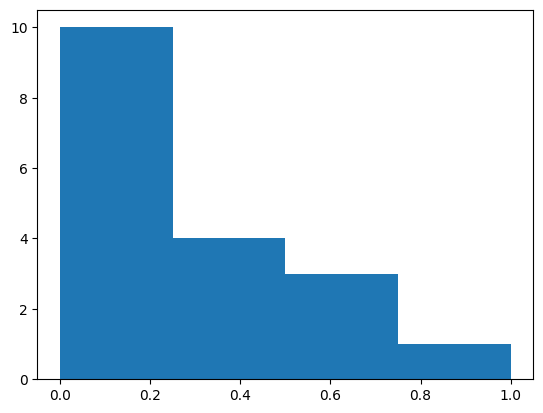

In [25]:
plt.hist(boundaries['Norm Drought Severity Index'], bins=4)

Define the boundaries with equal intervals (0-0.25, 0.25-0.5, 0.5-0.75, 0.75-1) using `pd.cut()` function

In [31]:
boundaries['Drought Severity Classes'] = pd.cut(boundaries['Norm Drought Severity Index'], bins=4, labels=[0,1,2,3])
boundaries

,NAME,SHPAREASQM,CODE_PROV,geometry,Drought Distribution,Drought Severity Index,Norm Drought Severity Index,Drought Severity Classes
0,Bengo,3.799123e+10,01,"MULTIPOLYGON (((13.12321 -7.83117, 13.12409 -7...",{-1.0: 479},0.000000,0.000000,0
1,Benguela,3.954707e+10,02,"MULTIPOLYGON (((12.53478 -13.49164, 12.53566 -...","{-1.0: 387, 0.0: 43, 1.0: 53, 2.0: 7, 3.0: 7, ...",0.407631,0.249227,0
2,Bié,7.214479e+10,03,"POLYGON ((16.51990 -12.92742, 16.51794 -12.921...","{-1.0: 723, 0.0: 62, 1.0: 54, 2.0: 60, 3.0: 3}",0.401330,0.245375,0
3,Cabinda,6.975749e+09,04,"POLYGON ((12.71099 -4.46888, 12.71347 -4.46740...","{-1.0: 68, 0.0: 11, 1.0: 7, 2.0: 1}",0.321839,0.196774,0
4,Kuando Kubango,1.997968e+11,05,"POLYGON ((22.23646 -16.57306, 22.26215 -16.575...","{-1.0: 1023, 0.0: 167, 1.0: 547, 2.0: 448, 3.0...",1.635577,1.000000,3
5,Kwanza Norte,2.029464e+10,06,"POLYGON ((14.54237 -9.77922, 14.53348 -9.77422...","{-1.0: 169, 0.0: 31, 1.0: 35, 2.0: 1, 3.0: 1}",0.455696,0.278615,1
6,Kwanza Sul,5.539526e+10,07,"POLYGON ((15.26511 -9.79956, 15.27292 -9.79810...","{-1.0: 645, 0.0: 12, 1.0: 17, 2.0: 17}",0.140376,0.085827,0
7,Kunene,7.735317e+10,08,"POLYGON ((16.29437 -17.38978, 15.38930 -17.386...","{-1.0: 609, 0.0: 31, 1.0: 160, 2.0: 122, 3.0: ...",0.986802,0.603336,2
8,Huambo,3.318300e+10,09,"POLYGON ((16.32605 -11.60639, 16.32709 -11.611...",{-1.0: 412},0.000000,0.000000,0
9,Huíla,7.874020e+10,10,"POLYGON ((15.54472 -13.76052, 15.56128 -13.756...","{-1.0: 900, 0.0: 73, 1.0: 16, 2.0: 6, 3.0: 1}",0.127510,0.077960,0


In [32]:
four_colors = [
    "yellow",
    "orange",
    "red",
    "darkred",
]
cmap2 = colors.ListedColormap(four_colors)

In [33]:
np.array(boundaries['Drought Severity Classes'])

array([0, 0, 0, 0, 3, 1, 0, 2, 0, 0, 0, 2, 1, 1, 2, 0, 1, 0], dtype=int64)

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\esl26\AppData\Local\Temp\ipykernel_6832\2179239869.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels(['Low', 'Moderate','High','Very High'])


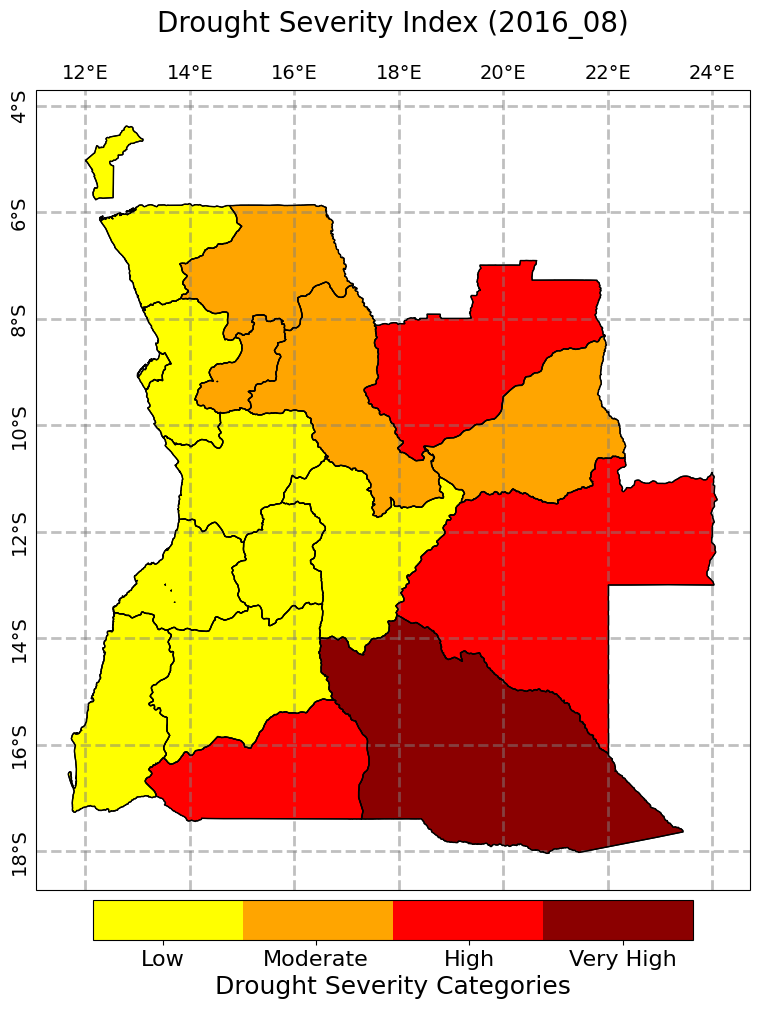

In [34]:
fig = plt.figure(figsize=(10, 10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                alpha=0.5, linestyle='--', ylabel_style={'size': 14, 'rotation': 'vertical'}, 
                xlabel_style={'size': 14})

gl.xlabels_bottom = False
gl.ylabels_right = False

plot = boundaries.plot(ax=ax, column='Drought Severity Classes', cmap=cmap2, linewidth=0.8, edgecolor='black')
boundaries.geometry.boundary.plot(ax=ax, color='black', linewidth=1)

cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.04])
cbar = plt.colorbar(plot.collections[0], cax=cbar_ax, orientation='horizontal', pad=0.05)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('Drought Severity Categories', fontsize=18)
cbar.set_ticklabels(['Low', 'Moderate','High','Very High'])
cbar.set_ticks(np.linspace(0.35,2.65,4))

fig.suptitle('Drought Severity Index (2016_08)', fontsize=20)

plt.savefig(f'../results/figures/ds_index_2016_08.png', dpi=300, bbox_inches='tight')

In [40]:
gpd.GeoDataFrame.to_csv(boundaries, '../results/ds_index_2016_08.csv', index=False)

Let's try testing if the csv file is a compatible file type for visualizing data.

In [44]:
crs

CRS.from_epsg(4326)

In [65]:
df = pd.read_csv('../results/ds_index_2016_08.csv')

df['geometry'] = df['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, crs='epsg:4326')
gdf

,NAME,SHPAREASQM,CODE_PROV,geometry,Drought Distribution,Drought Severity Index,Norm Drought Severity Index,Drought Severity Classes
0,Bengo,3.799123e+10,1,"MULTIPOLYGON (((13.12321 -7.83117, 13.12409 -7...",{-1.0: 479},0.000000,0.000000,0
1,Benguela,3.954707e+10,2,"MULTIPOLYGON (((12.53478 -13.49164, 12.53566 -...","{-1.0: 387, 0.0: 43, 1.0: 53, 2.0: 7, 3.0: 7, ...",0.407631,0.249227,0
2,Bié,7.214479e+10,3,"POLYGON ((16.51990 -12.92742, 16.51794 -12.921...","{-1.0: 723, 0.0: 62, 1.0: 54, 2.0: 60, 3.0: 3}",0.401330,0.245375,0
3,Cabinda,6.975749e+09,4,"POLYGON ((12.71099 -4.46888, 12.71347 -4.46740...","{-1.0: 68, 0.0: 11, 1.0: 7, 2.0: 1}",0.321839,0.196774,0
4,Kuando Kubango,1.997968e+11,5,"POLYGON ((22.23646 -16.57306, 22.26215 -16.575...","{-1.0: 1023, 0.0: 167, 1.0: 547, 2.0: 448, 3.0...",1.635577,1.000000,3
5,Kwanza Norte,2.029464e+10,6,"POLYGON ((14.54237 -9.77922, 14.53348 -9.77422...","{-1.0: 169, 0.0: 31, 1.0: 35, 2.0: 1, 3.0: 1}",0.455696,0.278615,1
6,Kwanza Sul,5.539526e+10,7,"POLYGON ((15.26511 -9.79956, 15.27292 -9.79810...","{-1.0: 645, 0.0: 12, 1.0: 17, 2.0: 17}",0.140376,0.085827,0
7,Kunene,7.735317e+10,8,"POLYGON ((16.29437 -17.38978, 15.38930 -17.386...","{-1.0: 609, 0.0: 31, 1.0: 160, 2.0: 122, 3.0: ...",0.986802,0.603336,2
8,Huambo,3.318300e+10,9,"POLYGON ((16.32605 -11.60639, 16.32709 -11.611...",{-1.0: 412},0.000000,0.000000,0
9,Huíla,7.874020e+10,10,"POLYGON ((15.54472 -13.76052, 15.56128 -13.756...","{-1.0: 900, 0.0: 73, 1.0: 16, 2.0: 6, 3.0: 1}",0.127510,0.077960,0


<Axes: >

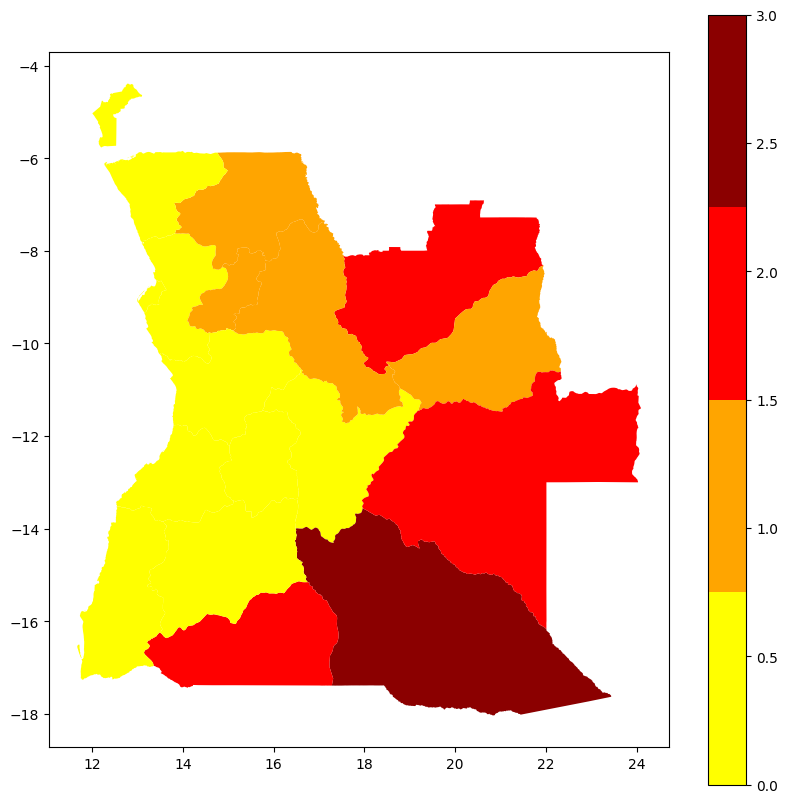

In [61]:
gdf.plot(column='Drought Severity Classes', legend=True, cmap=cmap2, figsize=(10, 10))

## Multiple Case
- Store all DS indices in a SHP file